## Equalización 


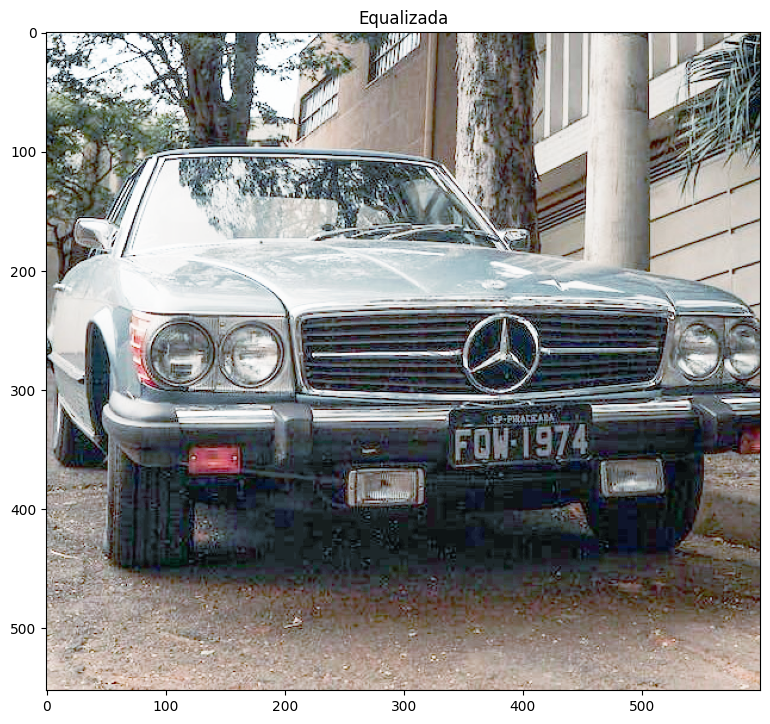

In [67]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
img = cv.imread('coche11.jpeg')
b,g,r = cv.split(img)
b_eq = cv.equalizeHist(b)
g_eq = cv.equalizeHist(g)
r_eq = cv.equalizeHist(r)
img_eq = cv.merge((b_eq, g_eq, r_eq))
imshow('Equalizada', img_eq)



## Localización de placas con técnicas tradicionales de visión por computadora
Para llevar a cabo el reconocimiento de placas es necesario antes localizarlas, existen una gran cantidad de condiciones que afectan una imagen como puede ser la iluminación, distancia y rotaciones, entre otros. Revisa las diferentes imágenes de coches que acompañan la actividad para que identifiques estos cambios. Para lograr el objetivo, hemos definido una metodología para encontrar placas candidatas en una imagen mediante técnicas tradicionales de procesamiento de imágenes, la metodología sugerida es la siguiente:

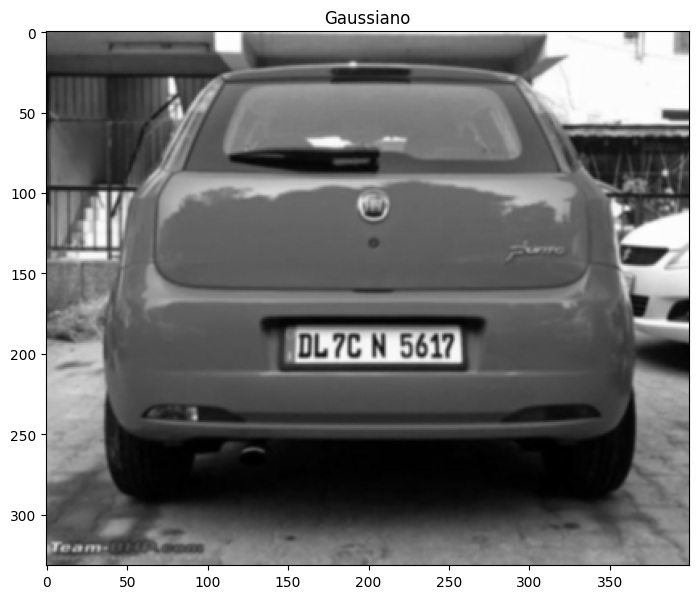

In [68]:
imgColor = cv.imread('cars34.png')
imgGris = cv.imread('cars34.png', cv.IMREAD_GRAYSCALE)
## Eliminando el caso 2 y utilizando coche 14 
## imgGris = cv.imread('coche14.jpeg', cv.IMREAD_GRAYSCALE) / blur = imgGris

## Paso numero 2 
blur = cv.GaussianBlur(imgGris, (3,3), 0)

imshow("Gaussiano",blur)


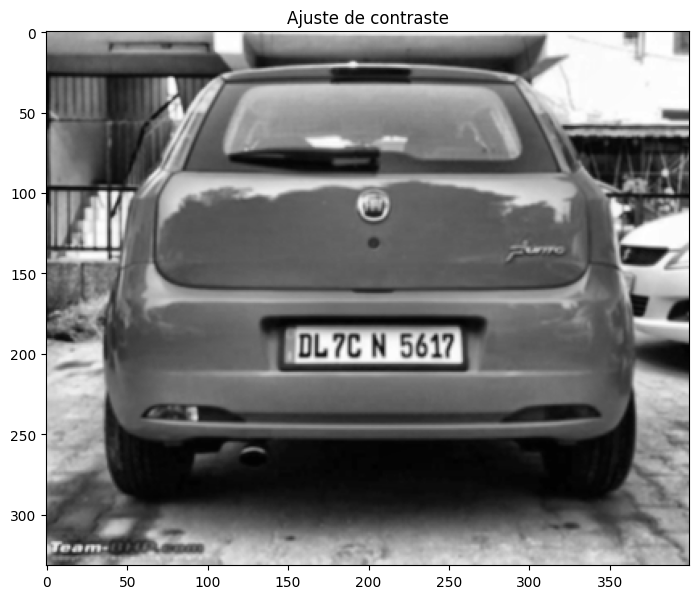

In [69]:
## Paso 3 
clahe = cv.createCLAHE(clipLimit=1.5, tileGridSize=(8,8))
equ01 = clahe.apply(blur)
imshow("Ajuste de contraste", equ01)

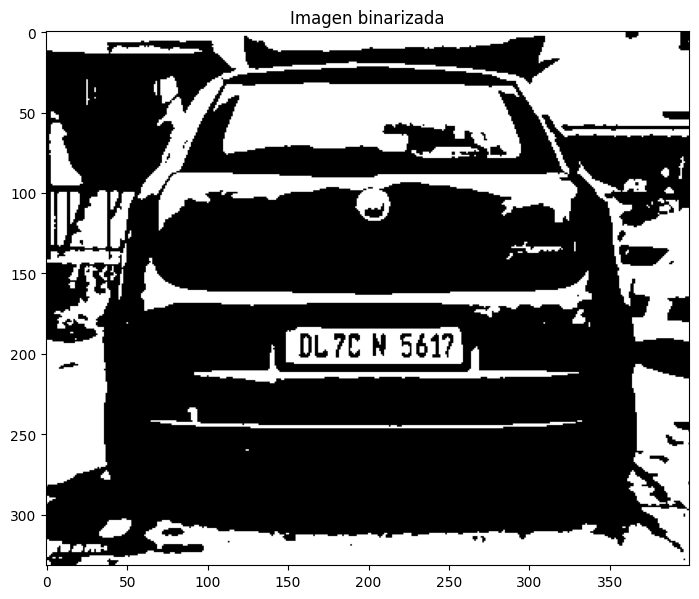

In [70]:
## Paso numero 4 
otsu_threshold, otsu01 = cv.threshold(equ01,0,255,cv.THRESH_OTSU)
imshow("Imagen binarizada", otsu01)

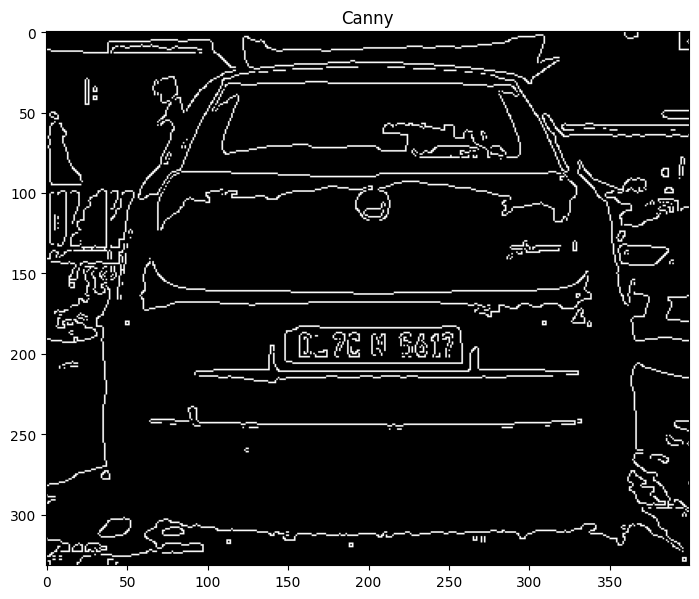

In [71]:
## paso numero 5 
edges = cv.Canny(otsu01,150,350)
imshow("Canny", edges)

In [72]:
## Paso numero 6 GUARDAR BORDES 
contours, hierachy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
long_contours = [cnt for cnt in contours if(cv.arcLength(cnt, True) > 200 and (cv.arcLength(cnt, True) < 700))]




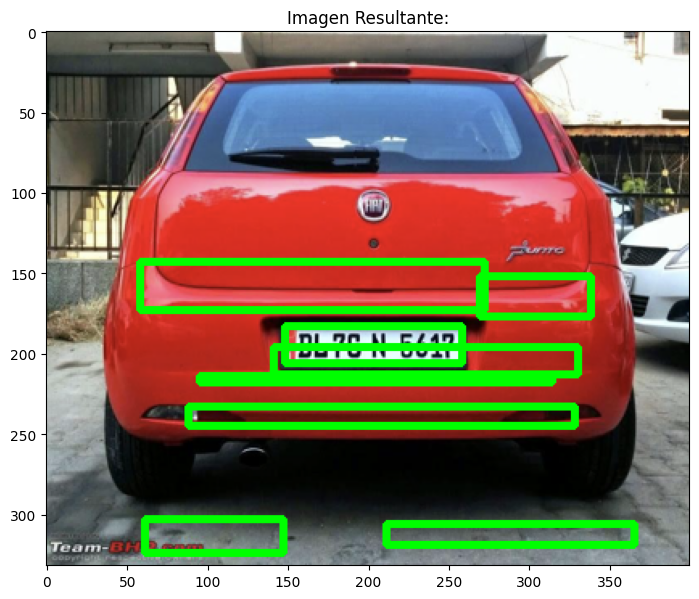

In [73]:
## Paso Numero 7  Dibujar placas candidatas 
alto, ancho, canales = imgColor.shape
for lonc in (long_contours):
    r = [x for [[x,y]] in lonc ]
    s = [y for [[x,y]] in lonc ]
    prop = ((max(s)-min(s))-(max(r)-min(r)))
    if((max(s)>round(alto/2) and prop<0)):
        cv.rectangle(imgColor,(min(r),min(s)),(max(r),max(s)),(0,255,0),3)

imshow("Imagen Resultante:", imgColor)